# Example: Centroid Vetting.
### How to look for centroid offset between in and out of transit
In this example we show how to use the vetting module to visualize the transit and take the difference between the in transit and out of transit to determine if there is a centroid offset between the two.

In [15]:
import numpy
import matplotlib
import exovetter as exo
from exovetter import const
from exovetter import utils
import exovetter.vetters as vet
import lightkurve as lk
import astropy.units as u

In [16]:
#Name of our first TOI Example
candidate = "TOI 1013.01"

### Use a utility function get_mast_tce to get the properties of the candidate and put into a tce.

In [17]:
tce = utils.get_mast_tce(candidate)
tce

[{'period': <Quantity 5.425555 d>,
  'epoch': <Quantity 58493.86798 d>,
  'epoch_offset': <Quantity -2400000.5 d>,
  'depth': <Quantity 0.01493963>,
  'duration': <Quantity 0.15745833 d>,
  'target': 'TOI 1013.01'}]

### Grab the light curve using lightkurve

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

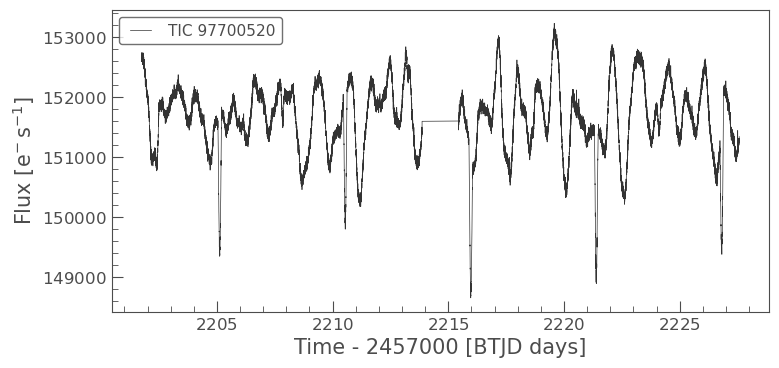

In [18]:
lc = lk.search_lightcurve(candidate, sector=33, exptime=120).download()
lc.plot()

[131. 132. 133. 134. 135.]
6
[130. 130. 130. ... 135. 135. 135.]


{'num_transits': 5}

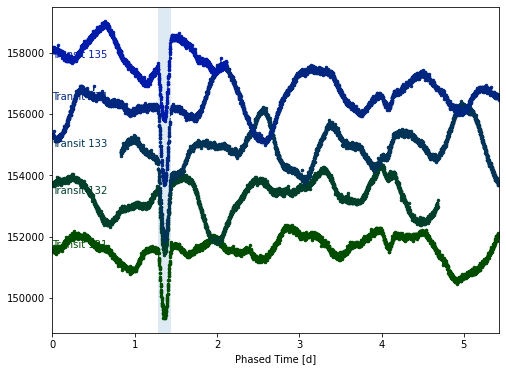

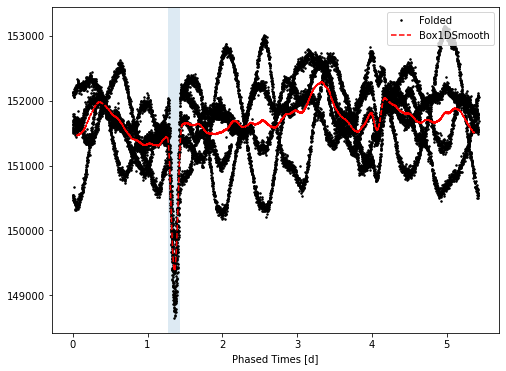

In [19]:
#Visualize the transits
#Initiate the vetter
viz = vet.VizTransits()

#Run the vetter on the tce and lightcurve of your choice.
viz.run(tce[0], lc, plot=True)

## Run the Centroid Vetter
The Centroid Vetter is run in the same way. It returns the average offset and significance that it is on the target.
You get several plots showing the out of transits, in transit and difference image. The centroids of each are measured using a Gaussian.
For the OOT and In-Transit, the centroid is constrained to the central +/-1pixel in box row and column direction.
As input, the Centroid Vetter requires a Target Pixel File objects from lightkurve.

This example shows no significant offset between the out of transit location and the difference image centroid.

{'offset': 0.021920783281230878, 'significance': array([0.43037493])}

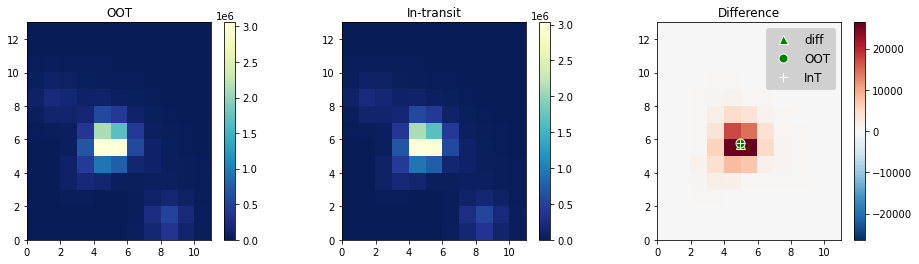

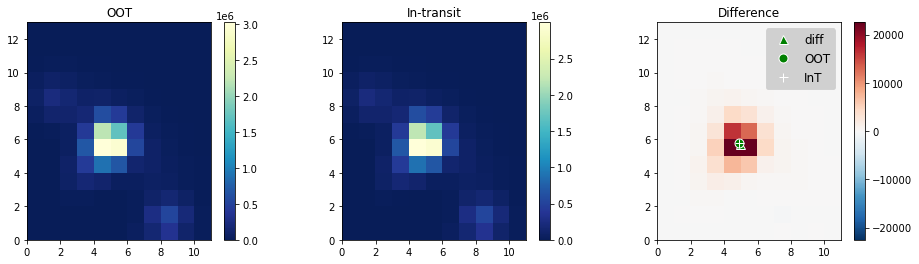

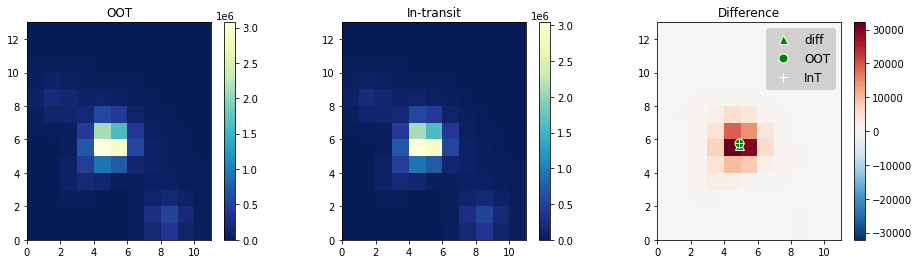

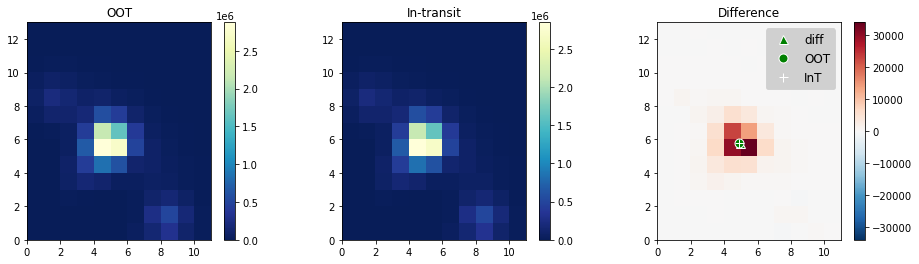

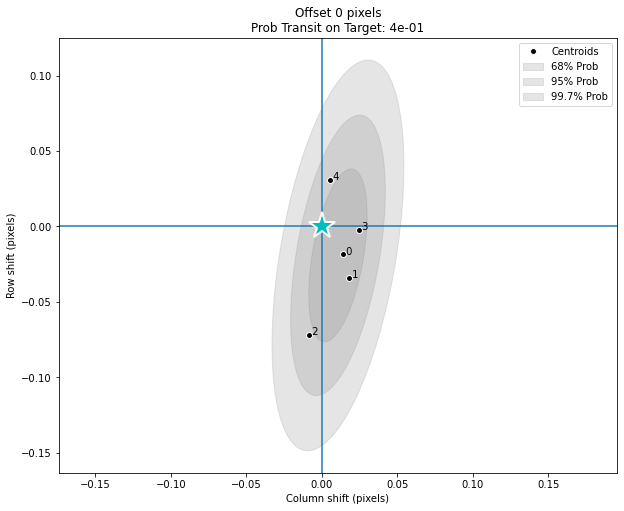

In [20]:

tpf = lk.search_targetpixelfile(candidate, sector=33, exptime=120).download()
cent = vet.Centroid()
cent.run(tce[0],tpf, plot=True)

## Example 2. An example with a small put possible offset.
Here we will do the same thing on TOI 565.01

In [21]:
candidate = "TOI 565.01"
tce = utils.get_mast_tce(candidate)
tce

[{'period': <Quantity 3.727891 d>,
  'epoch': <Quantity 58519.370491 d>,
  'epoch_offset': <Quantity -2400000.5 d>,
  'depth': <Quantity 0.0178643>,
  'duration': <Quantity 0.16139208 d>,
  'target': 'TOI 565.01'}]

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

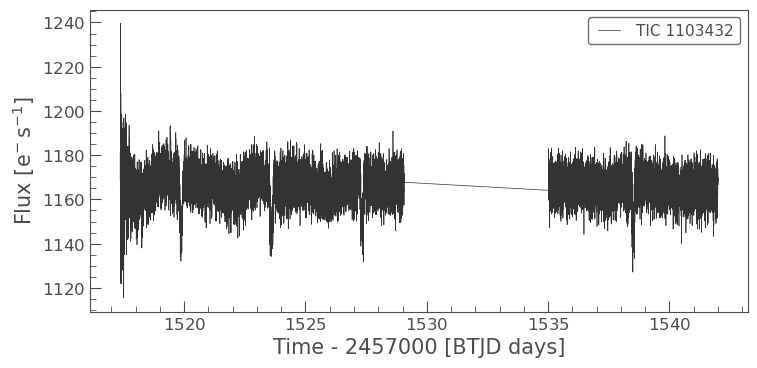

In [22]:
lc = lk.search_lightcurve(candidate)[0].download()
lc.plot()

[0. 1. 2. 4. 5. 6.]
7
[-1. -1. -1. ...  6.  6.  6.]


{'num_transits': 6}

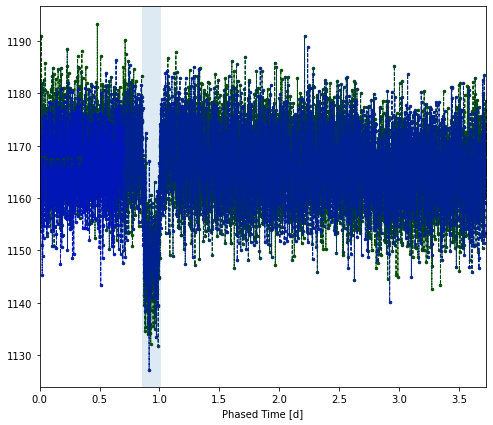

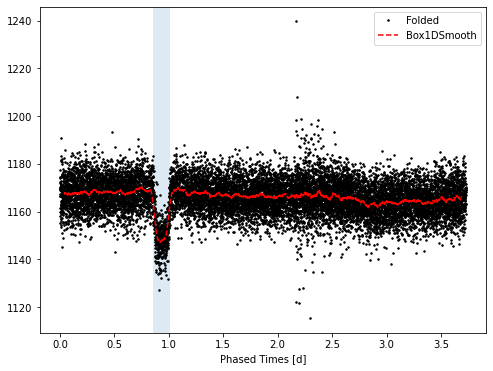

In [23]:
viz = vet.VizTransits(max_transits=8)
viz.run(tce[0],lc, plot=True, )

{'offset': 0.8649589008383504, 'significance': array([7.6219652e-68])}

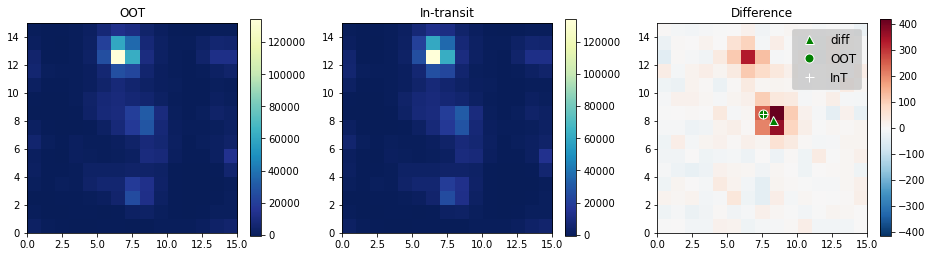

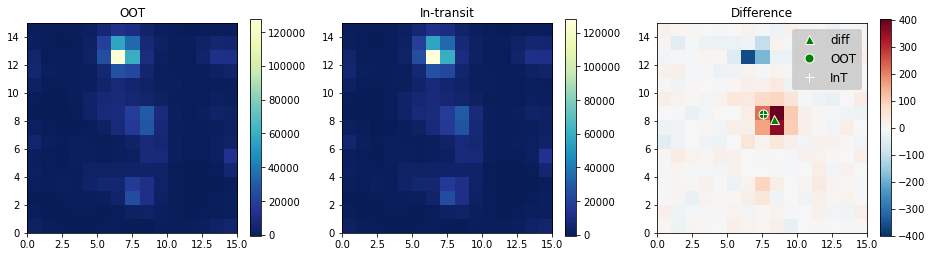

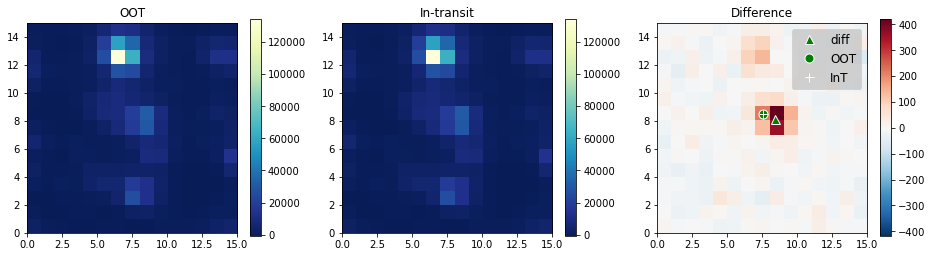

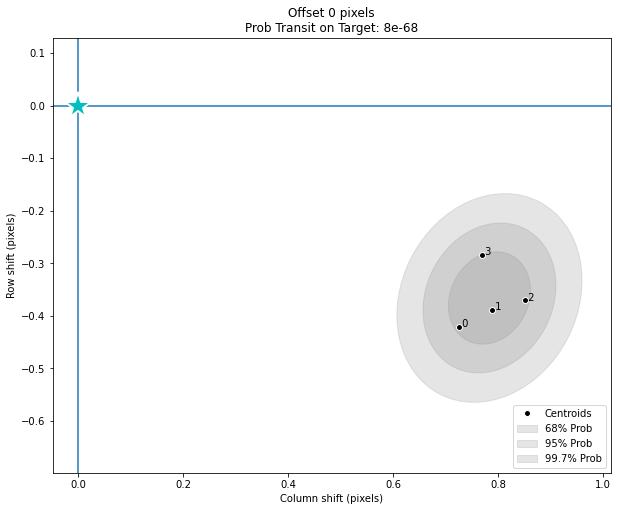

In [24]:
#Examine difference images and measure centroids
tpf = lk.search_targetpixelfile(candidate)[0].download()
cent = vet.Centroid()
cent.run(tce[0],tpf,plot=True)